# **TITANIC_SURVIVOR ANALYSIS**


   -- By Dharshini B

---










First, let us import necessary library packages for doing data analytics using python, namely , numpy and pandas .


In [ ]:
import numpy as np
import pandas as pd

Now,  let's read the *train.csv* file using *pd.read_csv function* and convert it into dataframe using *'pd.DataFrame()*'

> **Pandas DataFrame** is a two dimensional object which holds rows and columns and can hold values of different data types.






In [31]:
train_frame = pd.DataFrame(pd.read_csv('/My folder/train (1).csv')) #csv means Command Separated Values
train_frame.head() # returns first 5 rows if no argument is passed.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



## **Data extraction from DataFrames**:

---


Here, lets extract the information present in the dataframe named , '*train_frame*'.

In [ ]:
train_frame.shape #number of rows is 891 and number of columns is 12

(891, 12)

In [ ]:
train_frame.size #number of elements in entire dataset

10692

In [ ]:
train_frame.index #index information 

RangeIndex(start=0, stop=891, step=1)

In [ ]:
train_frame.columns #column names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_frame.count() #count of non-null values in each column

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64



**Description of the attributes of the given dataset**

 

*   Pclass       : Passenger class ( 1 for 1st ; 2 for 2nd ; 3 for 3rd )
*  Survived      : Survival ( 0 for No ; 1 for Yes )
*  Name          : Name of passenger
*  Sex           : Sex
*  Age           : Age
*  Sibsp         : Number of Siblings/Spouses aboard
*  Parch         : Number of Parents/Children aboard
*  Ticket        : Ticket number
*  Fare          : Passenger Fare (British pound)
*  Cabin         : Cabin number
*  Embarked      : Port of Embarkation (C for Cherbourg ; Q for Queenstown ; S for Southampton )













## HANDLING NULL VALUES

---



The dataset may contain many rows and columns where some entries in it may be missing (NaN), this can't be left as it is. 

 We need to handle those null values by either 
  
1.   Dropping the row or column which has null value 
    or
2.   Filling the null value with some appropriate value, for example , mean of all the values in the column.


 

In [ ]:
train_frame.isnull().sum() # returns the total number of null values in each of the columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The above result shows the total number of null values in each of the columns . 

From this data , lets find which column has **more than 35% of missing values using Boolean Indexing.**

In [ ]:
X = train_frame.isnull().sum()  
Max_nullcol = X [ X > (35/100 * train_frame.shape[0])] 
print(Max_nullcol)

Cabin    687
dtype: int64


Cabin column has more than 35 % of missing values . We can either drop the column or fill the column with the mean of all values in that column. 
First let me do the earlier ( dropping the column ).

In [ ]:
Max_nullcol.index

Index(['Cabin'], dtype='object')




> **Syntax to drop a column**: frame.drop( index_name , axis = 1, inplace = True ) 





In [ ]:
train_frame.drop( Max_nullcol.index, axis =1, inplace=True) #dropped the cabin column

In [ ]:
train_frame.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Now, I'm going to fill the missing values in the columns with mean value in that column.








> **Syntax for filling the null values** : frame.fillna(frame.mean(),inplace = True )





In [ ]:
train_frame.fillna(train_frame.mean(), inplace = True)

In [ ]:
train_frame.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


 **To note :** Embarked column has 2 null values still, even after filling values to null columns , because embarked column contains string values, it can't be filled with mean() 

To fill the *Embarked* column null values , we have to fill it with a string and for that we have to choose the string which has maximum frequency in that column .

In [ ]:
train_frame['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

   We have identified that ***'S'*** string occures in maximum frequency of 644 times in Embarked column using **describe()** function .


> 1.   top returns the value with maximum frequency
2.   freq gives the maximum frequency of top value
3.   unique tells about how many unique values are there in that column ( here it is 3 for 'S', 'C' and 'Q' )








Now it's time to fill the null values in Embarked column with 'S' ! :)

In [ ]:
train_frame['Embarked'].fillna('S', inplace = True)

In [ ]:
train_frame.isnull().sum() # Now all the null values have been filled , hurray !

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Finally , we eliminated the null values in our data set and filled it with appropriate values . Thus we have handled null values in our dataset. Lets move on to the next step of data analysis.

# **Correlation** : It tells the correlation between different columns.
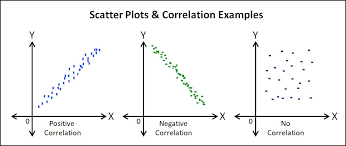


In [ ]:
train_frame.corr() #gives the relationship between each and every pair of columns which has number values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000




> From the above correlation table , we can conclude that there is a good correlation between Pclass and Survived, though it is negative . Negative correlation indicates that there is an inverse relationship between them , that is, for lower Pclass(1st class),  Survival rate is more and vice versa.



Next, we can add a new column to calculate the total family_size from sibsp and parch columns.

In [ ]:
train_frame['Family_size'] = train_frame['SibSp'] + train_frame['Parch']
train_frame.drop(['SibSp','Parch'], axis =1, inplace=True)
train_frame.corr()

,PassengerId,Survived,Pclass,Age,Fare,Family_size
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
Family_size,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


     Survived does not have a good correlation with family_size . Fare has good positive correlation with family size, which means that as family_size increases fare also increases.

 >  It is evident that for a lower Pclass( for 1 st class) , fare will be higher , hence the negative correlation. 

 >  Correlation between age and Pclass shows that older people preferred first class ( lower class) . 
 
  > Correlation between age and Family_size shows that older people aboarded with much smaller family than younger people . Younger people aboarded with more family members.

Lets check people whether alone or not affected the survival rate.


In [ ]:
train_frame['isAlone']= [0 if train_frame['Family_size'][i]> 0 else 1 for i in train_frame.index]
train_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_size,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1





---



### **Using groupby to combine two columns distinct values and computing the mean to analyse the data** 

---



In [ ]:
train_frame.groupby(['isAlone'])['Survived'].mean()

isAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

The above data shows that people who are alone has a less chance of surviving . 



> The reason might be that people with their family members onboard , might be given more preference to leave the sinking ship faster and they might be belonging to rich family .


In [ ]:
train_frame[['isAlone','Fare']].corr()

,isAlone,Fare
isAlone,1.000000,-0.271832
Fare,-0.271832,1.000000


So , it is evident that if passenger is alone , there is the chance the ticket fare would be lower and if passenger was not alone , the ticket fare would be higher.

In [ ]:
train_frame.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64



>It shows that female passengers have higher rate of survival than male passsengers . It shows that women were prioritized over men .


In [ ]:
train_frame['Teenagers'] = [ 1 if train_frame['Age'][i] > 12 and train_frame['Age'][i] < 20 else 0 for i in train_frame.index] # 1 for teenager (Age between 12 and 20) and 0 for non-teenagers


In [ ]:
x= train_frame['Teenagers'].sum() 
x/train_frame.shape[0] *100 # percentage of teenagers in the ship

10.662177328843995

>There are about 10 percentage of teenagers in the ship . 

In [ ]:
train_frame.groupby(['Teenagers'])['Survived'].mean()

Teenagers
0    0.380653
1    0.410526
Name: Survived, dtype: float64



---


It is found that teenagers(0.41) have a higher percentage of survival by 3% than non-teenagers(0.38).

---



In [ ]:
print('This table shows number of male and female passengers who are alone and not alone\n')

print(train_frame.groupby(['Sex','isAlone'])['isAlone'].count())

print('\nThis table shows number of male and female passengers who survived and not survived being alone and not alone\n')

print(train_frame.groupby(['Sex','isAlone','Survived'])['Survived'].count())

This table shows number of male and female passengers who are alone and not alone

Sex     isAlone
female  0          188
        1          126
male    0          166
        1          411
Name: isAlone, dtype: int64

This table shows number of male and female passengers who survived and not survived being alone and not alone

Sex     isAlone  Survived
female  0        0            54
                 1           134
        1        0            27
                 1            99
male    0        0           121
                 1            45
        1        0           347
                 1            64
Name: Survived, dtype: int64


>The above data shows that male who travelled with their family ,sacrificed their life to save his family women and male who travelled alone had a lesser number of survival rate than men who travelled with his family . 

>Female passengers who travelled with their families has more survival rate than those female passengers who were alone. 



---


From the above discussion , we can conclude that family 
passengers,especially women, were given higher priority than those who were alone and men who were alone was given the least priority.


---



Now, lets compare the survival rate with the embarkment location .





In [ ]:
train_frame.groupby(['Embarked'])['PassengerId'].count() #number of passengers embarked at each ports

Embarked
C    168
Q     77
S    646
Name: PassengerId, dtype: int64

In [ ]:
train_frame.groupby(['Embarked'])['Fare'].mean() # average fare received at each ports of embarkment


Embarked
C    59.954144
Q    13.276030
S    27.243651
Name: Fare, dtype: float64

In [ ]:
train_frame.groupby(['Embarked'])['Survived'].mean() # average people survived in accordance with ports of embarkment

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

Passengers who embarked at Cherbourg had a higher survival rate and those who embarked at Southampton survived in less numbers.



---


#**CONCLUSION :**

---



1. People with 1st class or rich people had a higher survival rate than other class people.
2. It is evident that for a lower Pclass( for 1 st class) , fare will be higher , hence the negative correlation.
3.  Passenegers who travelled with their family had a higher survival rate.
4.  Family passengers,especially women, were given higher priority than those who were alone and men who were alone was given the least priority.
5. Passengers who embarked at Cherbourg had a higher survival rate while those boarded at Southampton has the least survival rate.
6. It is found that teenagers(0.41) have a higher percentage of survival by 3% than non-teenagers(0.38).
7. It is evident that if passenger is alone , there is the chance the ticket fare would be lower and if passenger was not alone , the ticket fare would be higher.
8. Correlation between age and Pclass shows that older people preferred first class.
9. Correlation between age and Family_size shows that older people aboarded with much smaller family than younger people . Younger people aboarded with more family members.







